In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [244]:
def cost_function(X, y, m, w, b):
    h = np.dot(w, X.T) + b
    cost = (1 / m) * np.sum(np.square((h - y)))
    return cost

def gradient_descent(X, y, m, w, b):
    h = np.dot(w, X.T) + b
    dw = (1 / m) * np.sum(np.dot((h - y), X))
    db = (1 / m) * np.sum(h - y)
    return dw, db;

def feature_scaling(X, X_min, X_max):
    X = (X - X_min) / (X_max - X_min)
    return X

def predict(X_predict, X, w, b):
    print(X:)
    y = b + w[0, 0] * X[:, 0] + w[0, 1] * X[:, 1] + w[0, 2] * X[:, 2]
    return y

In [245]:
df = pd.read_csv("data/monthly_csv.csv")
df.head

<bound method NDFrame.head of         Date     Price
0    1950-01    34.730
1    1950-02    34.730
2    1950-03    34.730
3    1950-04    34.730
4    1950-05    34.730
..       ...       ...
842  2020-03  1593.764
843  2020-04  1680.030
844  2020-05  1715.697
845  2020-06  1734.032
846  2020-07  1840.807

[847 rows x 2 columns]>

In [246]:
# Load data into variables
array = df.to_numpy()

y = df.iloc[:, 1].to_numpy()
X = df.iloc[:, 0].str.replace("-", "").astype(int).to_numpy()

X_min = np.amin(X)
X_max = np.amax(X)

X = feature_scaling(X, X_min, X_max)
print(X[1:5])
print(y[1:5])


m = X.size

[0.00014273 0.00028547 0.0004282  0.00057094]
[34.73 34.73 34.73 34.73]


In [247]:
# Add polynomial features
X = X[None]

X2 = np.power(X, 2)
X3 = np.power(X, 3)

X2_min = np.amin(X2)
X2_max = np.amax(X2)

X3_min = np.amin(X3)
X3_max = np.amax(X3)

X2 = feature_scaling(X2, X2_min, X2_max)
X3 = feature_scaling(X3, X3_min, X3_max)

X = np.append(X, X2, axis=0)
X = np.append(X, X3, axis=0)

X = X.T

print(X.shape)
print(X2.shape)


(847, 3)
(1, 847)


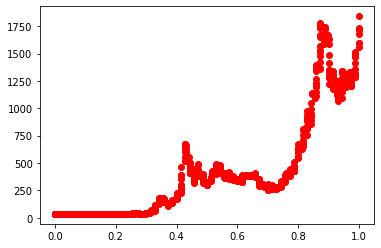

In [248]:
plt.scatter(X[:, 0].T, y, color="red")

In [249]:
# Model
w = np.random.rand(3)[None]
b = 0

iterations = 1000
learning_rate = 0.05

for i in range(iterations):
    cost = cost_function(X, y, m, w, b)
    print("Cost: " + str(cost))
    dw, db = gradient_descent(X, y, m, w, b)
    w = w - learning_rate * dw
    b = b - learning_rate * db

Cost: 378113.21253669047
Cost: 302429.9527310884
Cost: 245100.1120711571
Cost: 201630.99222103792
Cost: 168630.8448787103
Cost: 143539.04695683657
Cost: 124422.40634857892
Cost: 109821.39049801318
Cost: 98634.04232003663
Cost: 90028.34677242402
Cost: 83376.07518222542
Cost: 78202.84339912719
Cost: 74150.40997143796
Cost: 70948.21447029096
Cost: 68391.8913194773
Cost: 66327.04952397328
Cost: 64637.02769354429
Cost: 63233.65006862609
Cost: 62050.24804265762
Cost: 61036.391938299676
Cost: 60153.91387795005
Cost: 59373.90531970222
Cost: 58674.450382605304
Cost: 58038.91463059147
Cost: 57454.6531811714
Cost: 56912.035369664285
Cost: 56403.708387132356
Cost: 55924.0413244749
Cost: 55468.70540925988
Cost: 55034.35705797693
Cost: 54618.398546710574
Cost: 54218.79727865261
Cost: 53833.94928877811
Cost: 53462.576145339386
Cost: 53103.647064620556
Cost: 52756.320061039034
Cost: 52419.89746876619
Cost: 52093.79231404409
Cost: 51777.50288024369
Cost: 51470.59345910206
Cost: 51172.679773320866
Cost:

Cost: 40909.17587937802
Cost: 40909.175879353104
Cost: 40909.17587932889
Cost: 40909.17587930537
Cost: 40909.17587928248
Cost: 40909.175879260256
Cost: 40909.17587923866
Cost: 40909.175879217655
Cost: 40909.175879197246
Cost: 40909.17587917741
Cost: 40909.17587915814
Cost: 40909.17587913941
Cost: 40909.17587912119
Cost: 40909.1758791035
Cost: 40909.175879086295
Cost: 40909.17587906958
Cost: 40909.175879053335
Cost: 40909.17587903754
Cost: 40909.1758790222
Cost: 40909.17587900729
Cost: 40909.17587899279
Cost: 40909.17587897871
Cost: 40909.17587896502
Cost: 40909.175878951704
Cost: 40909.175878938775
Cost: 40909.175878926195
Cost: 40909.175878913986
Cost: 40909.17587890211
Cost: 40909.17587889057
Cost: 40909.17587887935
Cost: 40909.17587886845
Cost: 40909.17587885785
Cost: 40909.175878847556
Cost: 40909.17587883755
Cost: 40909.17587882783
Cost: 40909.17587881839
Cost: 40909.17587880918
Cost: 40909.175878800255
Cost: 40909.17587879158
Cost: 40909.175878783135
Cost: 40909.17587877495
Cost:

In [250]:
print("w: " + str(w))
print("b: " + str(b))
print(w[0, 0])
print(X.shape)
print(X2.shape)
print(X3.shape)

w: [[471.32216529 471.02896412 470.65673867]]
b: -91.59614467091858
471.3221652902955
(847, 3)
(1, 847)
(1, 847)


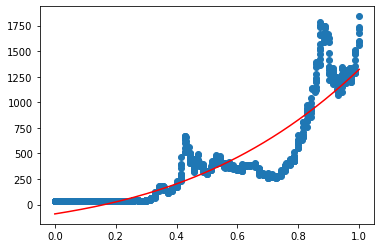

In [251]:
plt.plot(X[:, 0], (b + w[0, 0] * X[:, 0] + w[0, 1] * X2 + w[0, 2] * X3).T, "-r")
plt.scatter(X[:, 0].T, y)
plt.show()

In [252]:
# Prediction
X_predict = feature_scaling(202108, X_min, X_max)
y = predict(X_predict, X, w, b)
print("Predicted price for 2021-08: " + str(y))

Predicted price for 2021-08: [ -91.59614467  -91.528861    -91.46155813  -91.39423604  -91.32689474
  -91.25953422  -91.19215446  -91.12475546  -91.05733721  -90.9898997
  -90.92244292  -90.85496687  -84.7714048   -84.70216038  -84.63289594
  -84.56361147  -84.49430696  -84.4249824   -84.35563779  -84.28627312
  -84.21688837  -84.14748355  -84.07805863  -84.00861362  -77.74652543
  -77.67523815  -77.60393002  -77.53260104  -77.46125121  -77.3898805
  -77.31848892  -77.24707645  -77.17564309  -77.10418883  -77.03271366
  -76.96121758  -70.51329465  -70.43988238  -70.36644845  -70.29299285
  -70.21951556  -70.14601659  -70.07249591  -69.99895354  -69.92538944
  -69.85180363  -69.77819609  -69.7045668   -63.06350053  -62.98788116
  -62.9122393   -62.83657495  -62.76088809  -62.68517873  -62.60944685
  -62.53369244  -62.4579155   -62.38211601  -62.30629397  -62.23044937
  -55.38893113  -55.31102254  -55.23309063  -55.15513542  -55.07715688
  -54.99915501  -54.9211298   -54.84308124  -54.76